<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab Ditribuições**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Q1.

Considere a base de dados `glasses` de materiais de vidros reciclados.

* Quais dentre os valores 'clarity', 'density', 'purity' e 'silica' definem/separam mais claramente a qualidade dos vidros reciclados?
* Para isso faça um gráfico distribuição dos valores pelas classes de qualidade.
* Crie os gráficos para os 4 valores, em uma única figura, e empregue o comando `zip()` para iterar os valores e eixos da figura.





In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/glasses.csv')
df.head()


,color,clarity,density,purity,silica,quality,price+
0,E,51.0,35.0,14.0,2.0,Accept,326
1,E,49.0,30.0,14.0,2.0,Accept,326
2,E,47.0,32.0,13.0,2.0,Accept,327
3,I,46.0,31.0,15.0,2.0,Accept,334
4,J,50.0,36.0,14.0,2.0,Accept,335


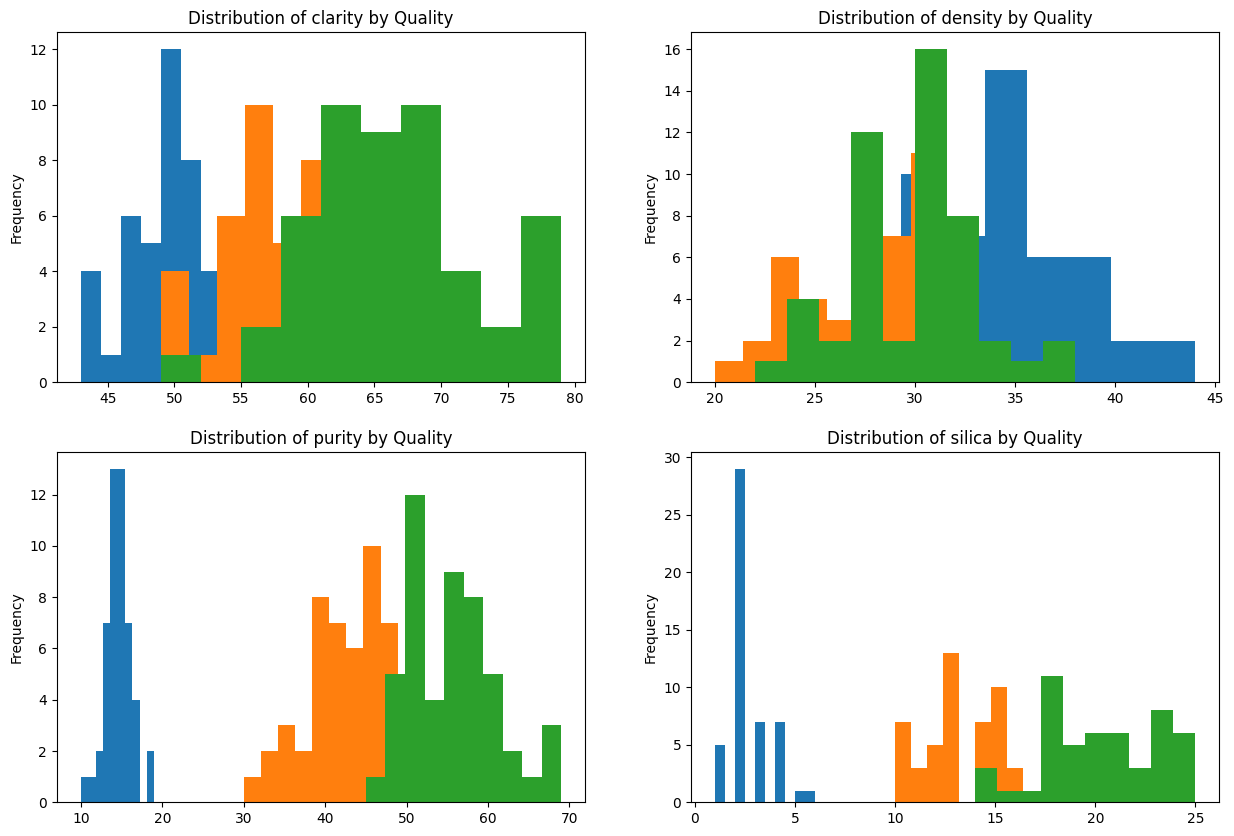

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

values = ['clarity', 'density', 'purity', 'silica']

for value, ax in zip(values, axes.flatten()):
    df.groupby('quality')[value].plot.hist(ax=ax)
    ax.set_title(f'Distribution of {value} by Quality')

plt.show()


# Q2.

Considere a base de dados `glasses` de materiais de vidros reciclados.

* Quais dentre os valores 'clarity', 'price+', 'purity' e 'silica' têm uma distribuição mais próxima da normal? Faça uma análise através da visualização dos dados.
* Crie os gráficos para os 4 valores, em uma única figura.

<ipython-input-4-014d1e08a4ad>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[value], ax=ax)
<ipython-input-4-014d1e08a4ad>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[value], ax=ax)
<ipython-input-4-014d1e08a4ad>:6: UserWarning: 

`distplot` is a deprecated function and will be rem

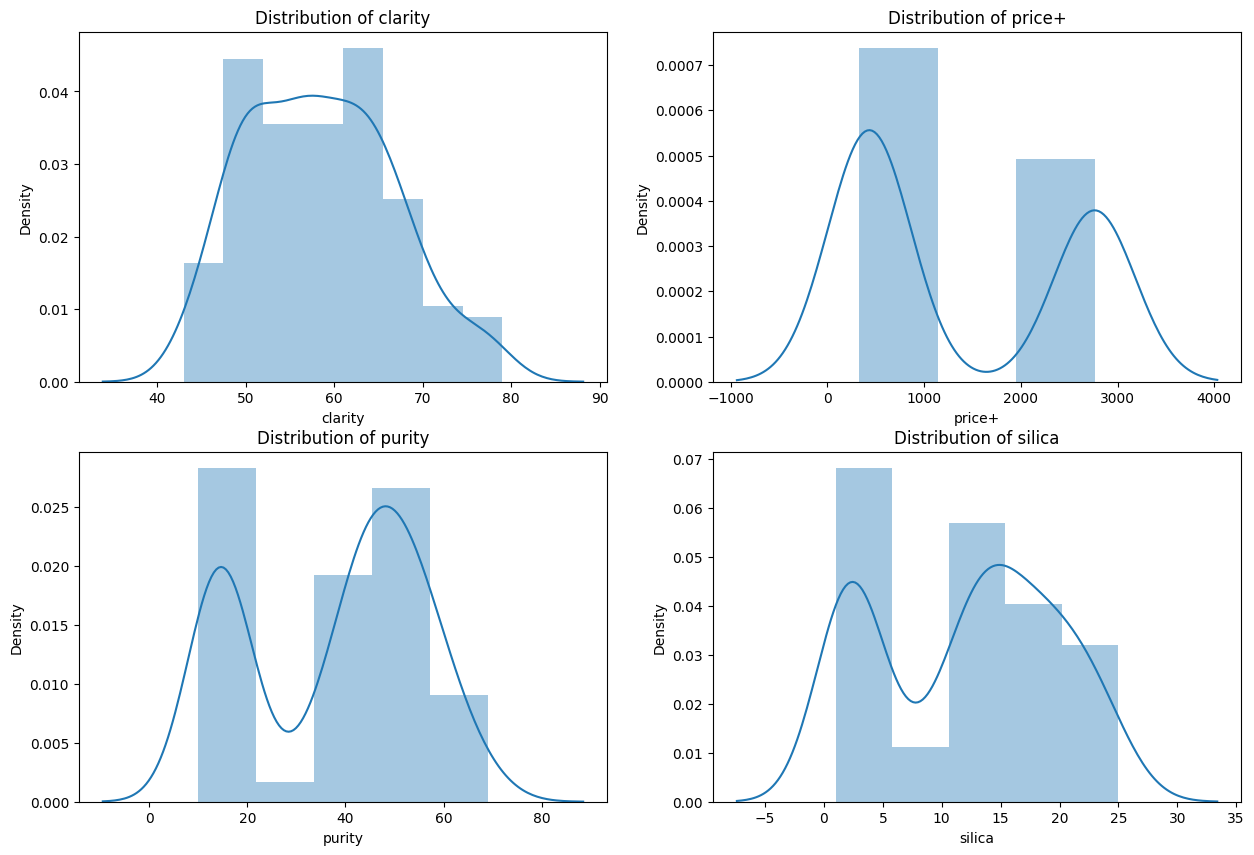

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

values = ['clarity', 'price+', 'purity', 'silica']

for value, ax in zip(values, axes.flatten()):
    sns.distplot(df[value], ax=ax)
    ax.set_title(f'Distribution of {value}')

plt.show()


# Q3.

Considere a base de dados `glasses` de materiais de vidros reciclados.

A)

* Quais dentre os valores 'clarity', 'density', 'purity', 'silica' qual(is) apresenta(m) mais *outliers*?
* Crie um único gráfico (não só uma única figura) para todos valores.

B)

* No gráfico anterior, inclua o `price+`. Veja o que é necessário para melhorar o aspecto do gráfico? Existem *outliers* de preços?

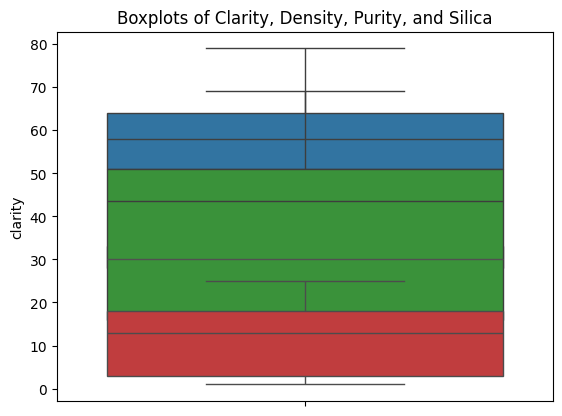

In [ ]:
# A)

fig, ax = plt.subplots()

values = ['clarity', 'density', 'purity', 'silica']

for value in values:
    sns.boxplot(y=df[value], ax=ax)

ax.set_title('Boxplots of Clarity, Density, Purity, and Silica')
plt.show()



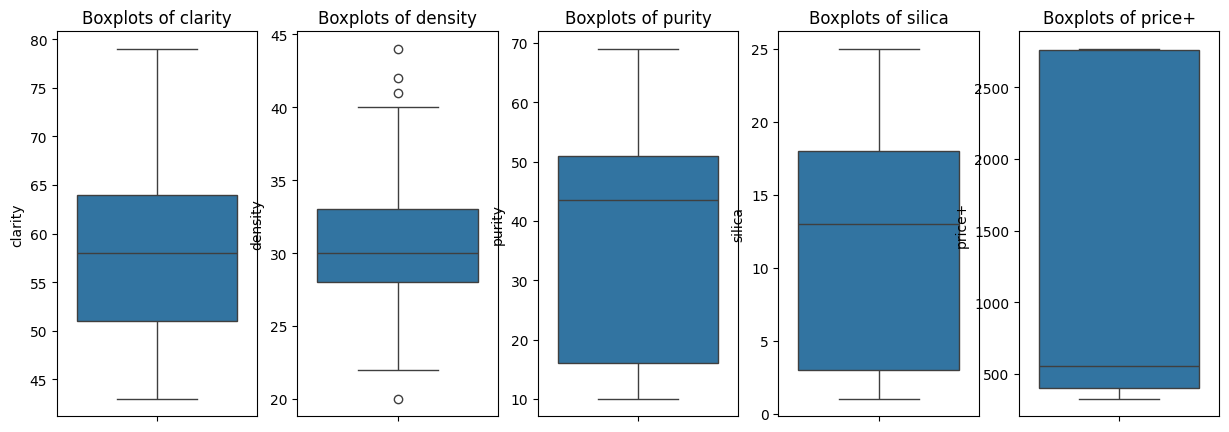

In [ ]:
# B)

fig, ax = plt.subplots(1, 5, figsize=(15,5))

values = ['clarity', 'density', 'purity', 'silica', 'price+']

for i, value in enumerate(values):
    sns.boxplot(y=df[value], ax=ax[i])
    ax[i].set_title(f'Boxplots of {value}')
plt.show()



# Q4.

A.

Considere a base de dados `flights` sobre atrasos de vôos. Você está interessado em determinar uma taxa de penalidade para as companias com maior atraso. Você decide penalizar atrasos superiores aos 20% maiores atrasos do seu histórico.

* Crie os gráficos distribuição e de densidade de probabilidade acumulada em uma única figura e indique com uma linha o ponto de penalidade das companias.
* Preencha colorindo a faixa de valores penalizada.
* Quais companias, no histórico de vôos, seriam então penalizadas?
* Salve sua figura em formato `.png` e poste a figura no Canvas.

B.

Qual compania não apresenta *outliers* de atraso?

C.

Considerando 10 intervalos de atraso, qual o intervalo com maior número de ocorrências e a sua quantidade.

In [ ]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


In [ ]:
import numpy as np
bins = np.linspace(flights['arr_delay'].min(), flights['arr_delay'].max(), 10)
counts, bins = np.histogram(flights['arr_delay'], bins=bins)

max_count = np.max(counts)
max_bin_index = np.argmax(counts)

print(f"The interval with the most occurrences is [{bins[max_bin_index]}, {bins[max_bin_index+1]}] with {max_count} occurrences.")


The interval with the most occurrences is [-20.0, 0.0] with 122516 occurrences.


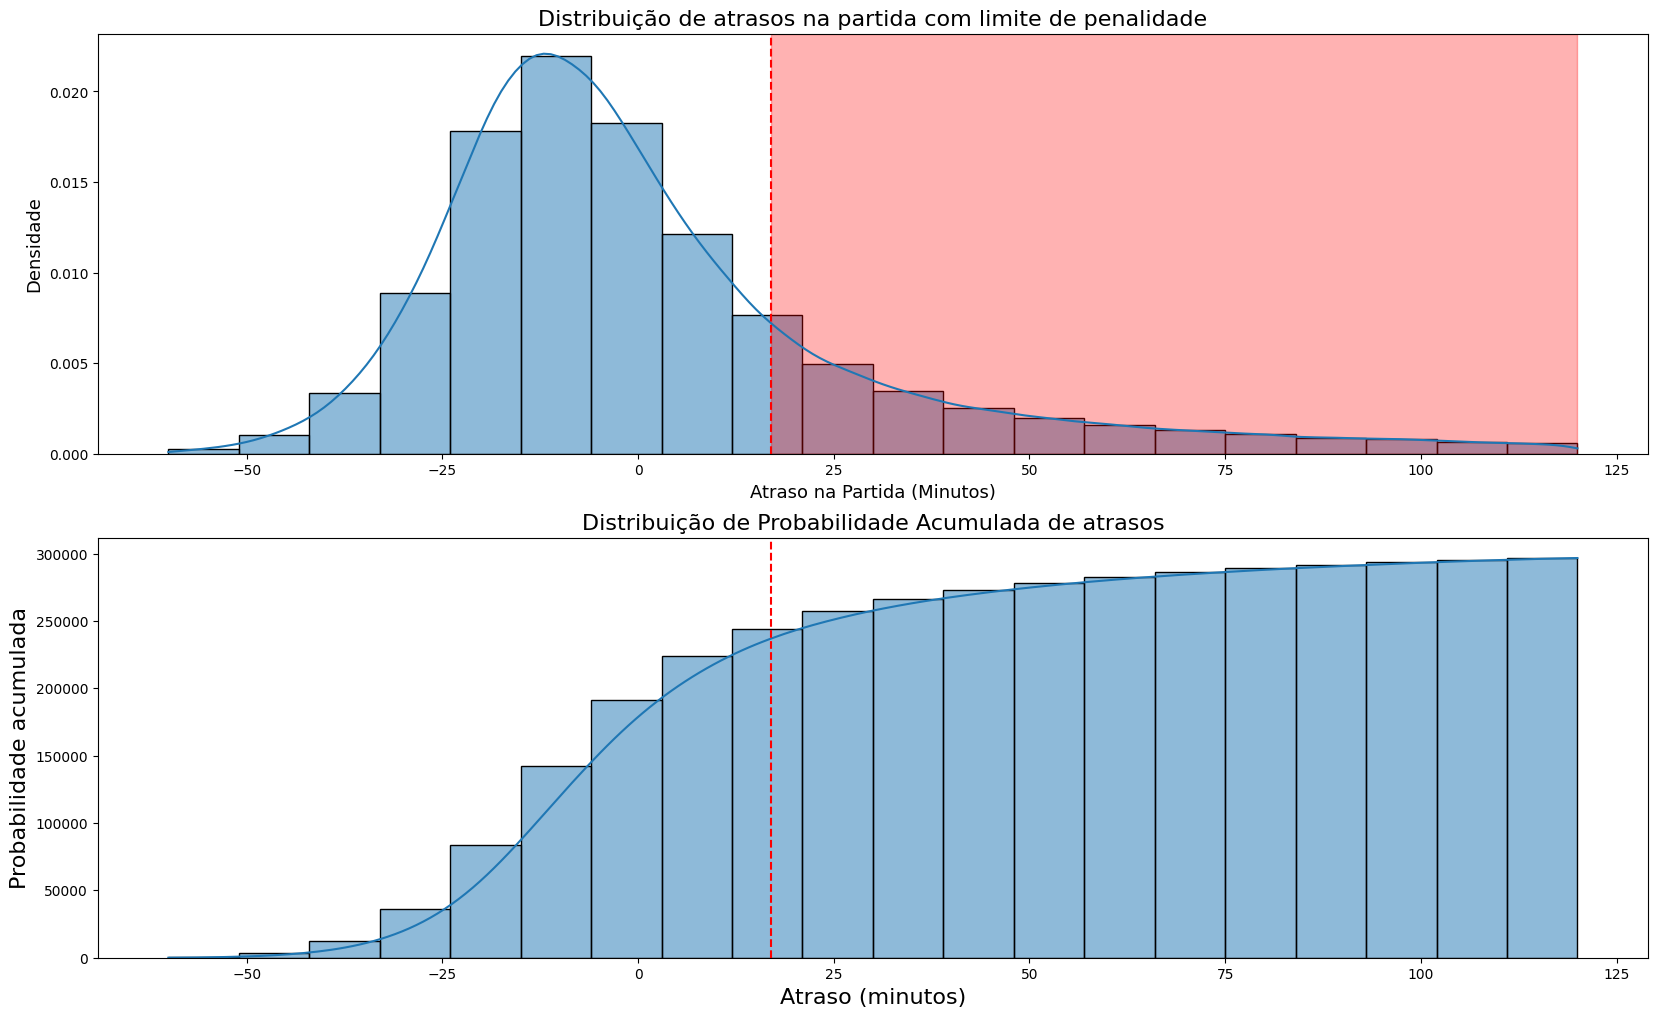

In [ ]:
# A.
fig, ax = plt.subplots(2, 1, figsize=(20, 12))

sns.histplot(data=flights, x="arr_delay",stat="density",  bins=20, kde=True, ax=ax[0])

delay_threshold = np.percentile(flights['arr_delay'], 80)

ax[0].axvline(delay_threshold, color='red', linestyle='--', label='Limite de atraso')

ax[0].axvspan(delay_threshold, max(flights["arr_delay"]),alpha=0.3, color='red')
ax[0].set_title('Distribuição de atrasos na partida com limite de penalidade', fontsize=16)
ax[0].set_xlabel('Atraso na Partida (Minutos)', fontsize=13)
ax[0].set_ylabel('Densidade', fontsize=13)

airlines_to_penalize = flights[flights['arr_delay'] > delay_threshold]['name'].unique()

sns.histplot(data=flights, x="arr_delay", bins=20, kde=True, cumulative=True, ax=ax[1])

ax[1].axvline(delay_threshold, color='red', linestyle='--', label='Limite de atraso')

ax[1].set_title("Distribuição de Probabilidade Acumulada de atrasos", fontsize=16)
ax[1].set_xlabel("Atraso (minutos)", fontsize=16)
ax[1].set_ylabel("Probabilidade acumulada", fontsize=16)
plt.show()




In [ ]:
print([name for name in flights["name"] if name not in airlines_to_penalize])

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'Atlantic Southeast Airlines', 'American Eagle Airlines Inc.',
       'US Airways Inc.', 'Southwest Airlines Co.', 'Virgin America',
       'Alaska Airlines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Skywest Airlines Inc.'], dtype=object)

In [ ]:
delay_threshold = np.percentile(flights['arr_delay'], 80)
airlines_to_penalize = (flights[flights['arr_delay'] > delay_threshold]['name'])

In [ ]:
print([name for name in flights["name"] if name not in airlines_to_penalize.unique])


KeyboardInterrupt: 

<Axes: xlabel='name', ylabel='arr_delay'>

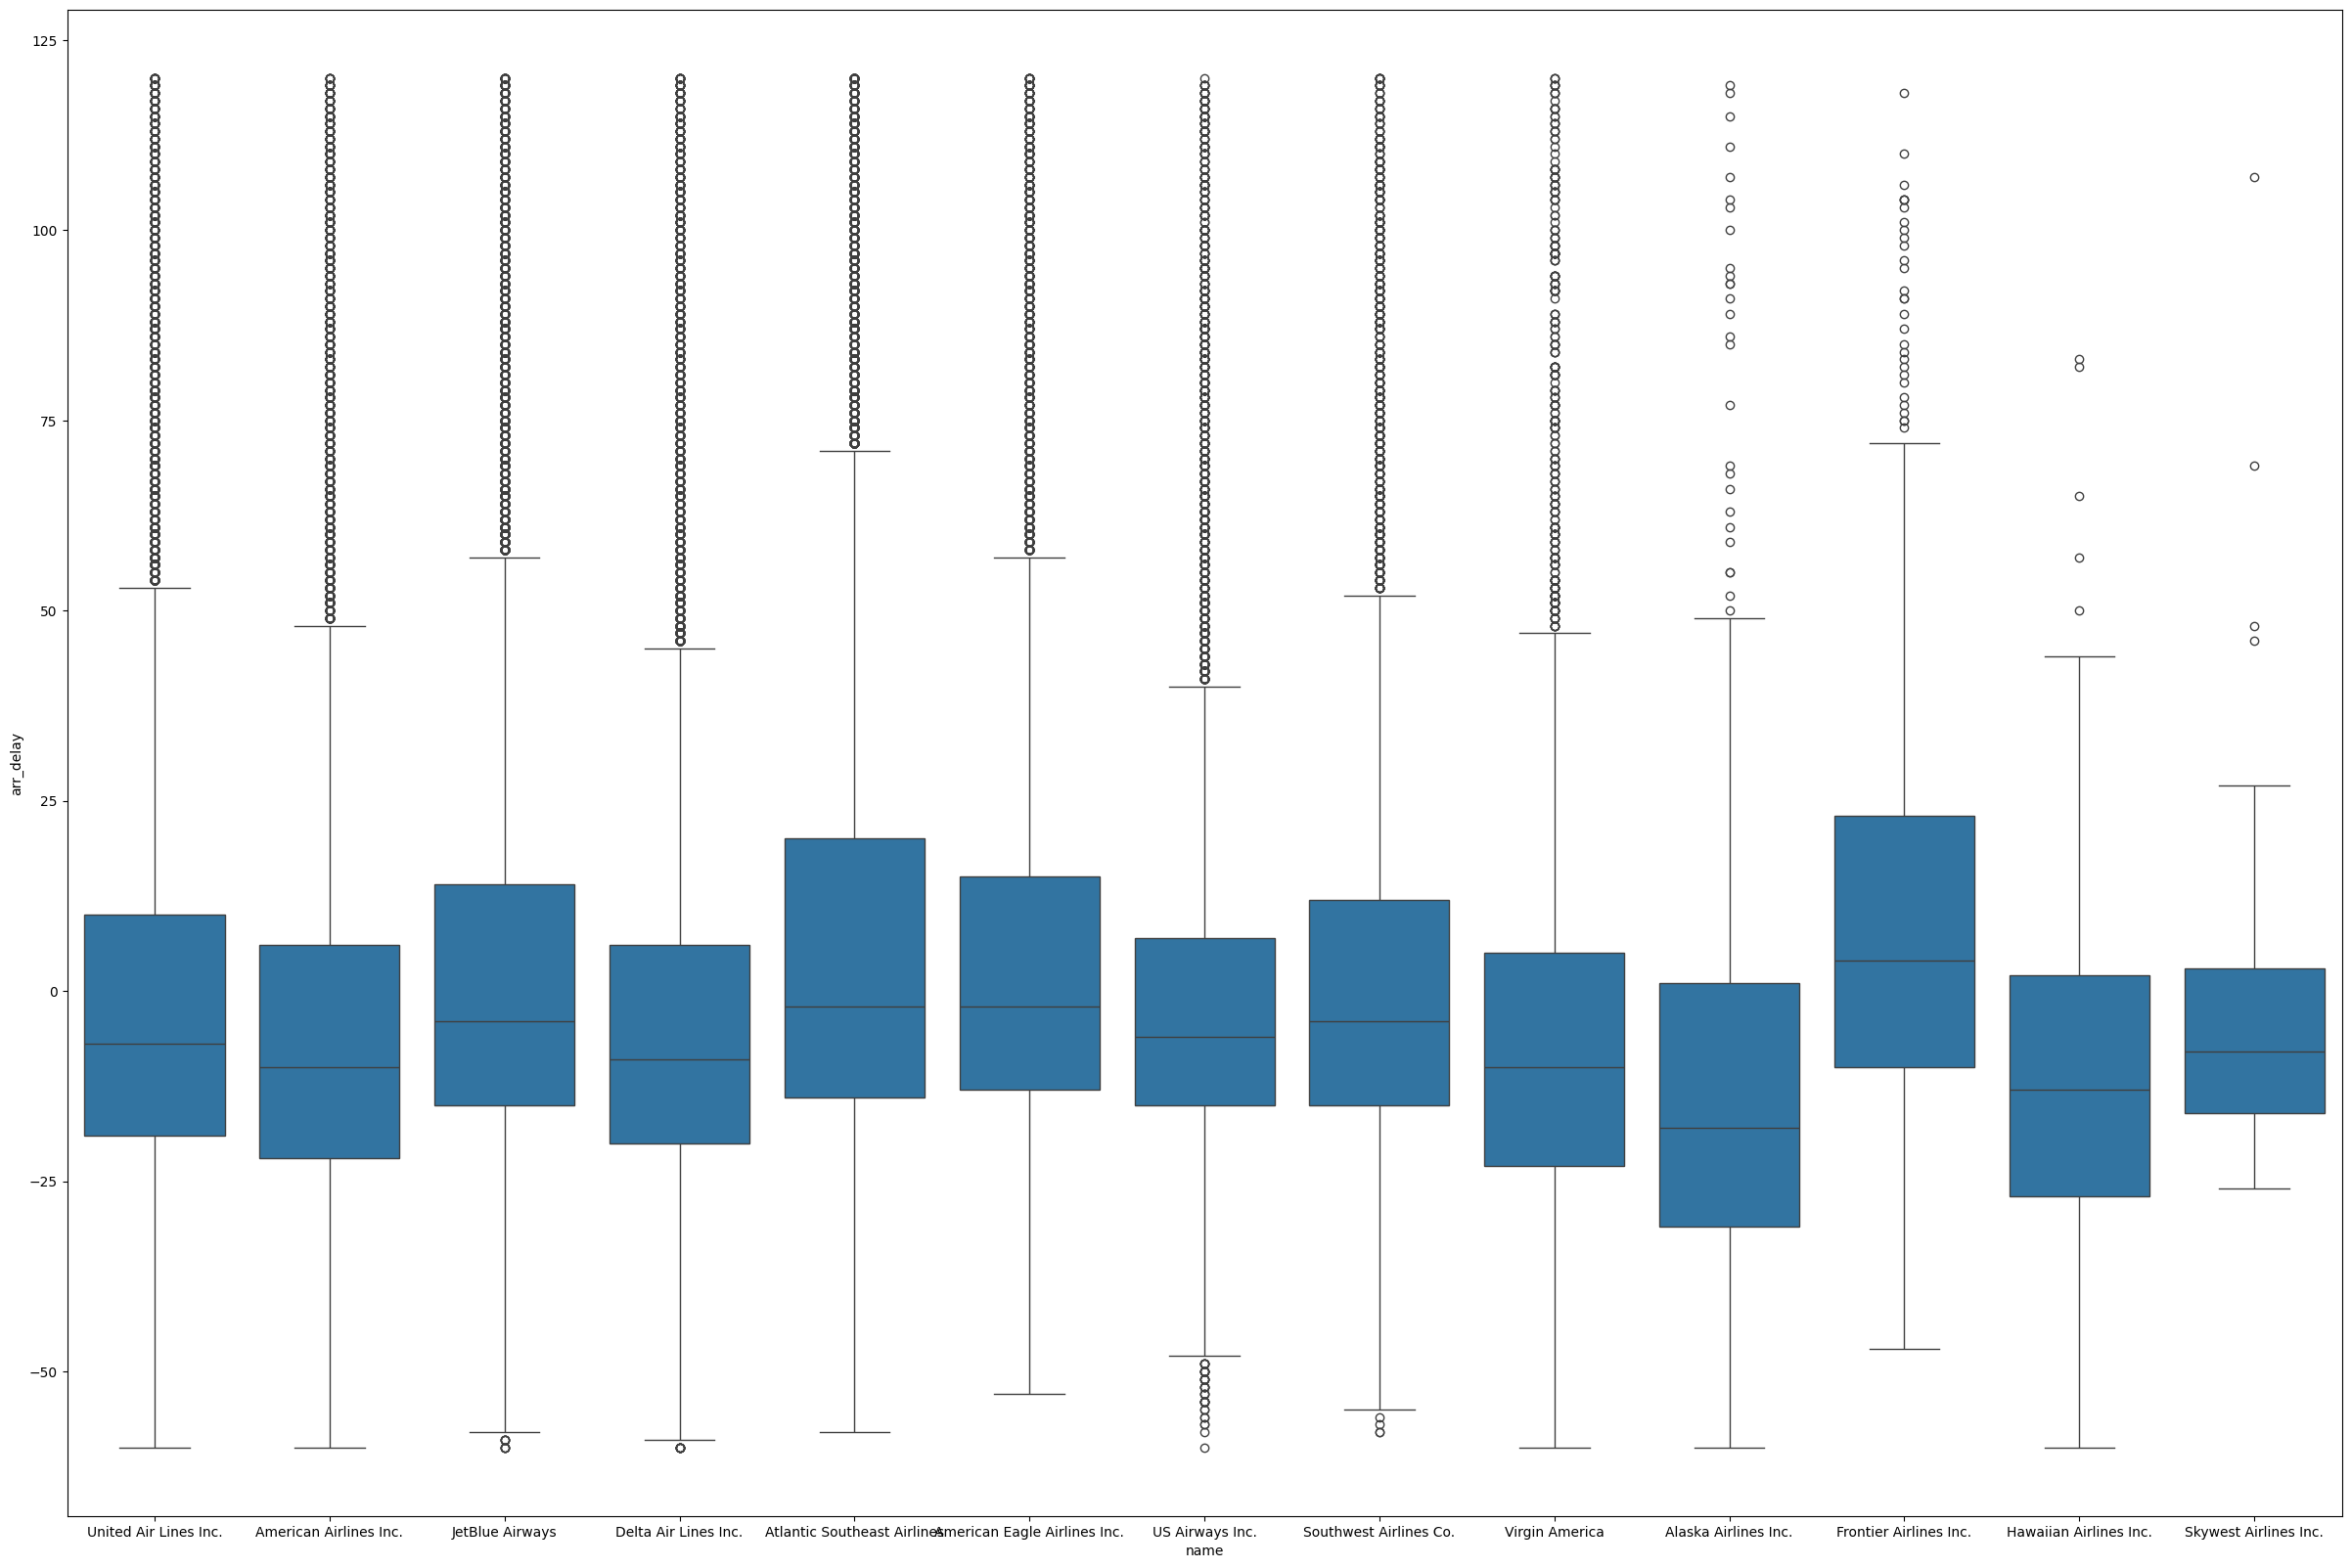

In [ ]:
plt.subplots(figsize=(30,20))
sns.boxplot(y=flights["arr_delay"], x=flights["name"])